In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df=pd.read_csv("C:\\Users\\vansh\\Downloads\\disney_plus_titles.csv")
df.head()


,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,description_sentiment,type_encoded,rating_encoded,cluster,year_added,month_added
0,0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,2021-09-24,2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...,0.000,0,5,0,2021.0,9.0
1,1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...,0.000,0,0,4,2021.0,9.0
2,2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,0.650,0,2,1,2021.0,9.0
3,3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...,0.375,1,5,0,2021.0,9.0
4,4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...,0.000,1,6,2,2021.0,9.0


In [2]:
#perform text Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1368 non-null   int64  
 1   show_id                1368 non-null   object 
 2   type                   1368 non-null   object 
 3   title                  1368 non-null   object 
 4   director               928 non-null    object 
 5   cast                   1194 non-null   object 
 6   country                1193 non-null   object 
 7   date_added             1365 non-null   object 
 8   release_year           1368 non-null   int64  
 9   rating                 1366 non-null   object 
 10  duration               1368 non-null   object 
 11  listed_in              1368 non-null   object 
 12  description            1368 non-null   object 
 13  description_sentiment  1368 non-null   float64
 14  type_encoded           1368 non-null   int64  
 15  rati

In [3]:
#missing values
df.isnull().sum()

Unnamed: 0                 0
show_id                    0
type                       0
title                      0
director                 440
cast                     174
country                  175
date_added                 3
release_year               0
rating                     2
duration                   0
listed_in                  0
description                0
description_sentiment      0
type_encoded               0
rating_encoded             0
cluster                    0
year_added                 3
month_added                3
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,release_year,description_sentiment,type_encoded,rating_encoded,cluster,year_added,month_added
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1365.000000,1365.000000
mean,683.500000,2002.348684,0.098366,0.275585,3.273392,2.005848,2019.616850,8.775824
std,395.051895,22.127559,0.296196,0.446972,2.306403,1.409019,0.768998,3.253399
min,0.000000,1928.000000,-1.000000,0.000000,0.000000,0.000000,2019.000000,1.000000
25%,341.750000,1998.000000,0.000000,0.000000,1.000000,1.000000,2019.000000,7.000000
50%,683.500000,2011.000000,0.000000,0.000000,4.000000,2.000000,2019.000000,11.000000
75%,1025.250000,2018.000000,0.250000,1.000000,5.000000,3.000000,2020.000000,11.000000
max,1367.000000,2021.000000,1.000000,1.000000,9.000000,4.000000,2021.000000,12.000000


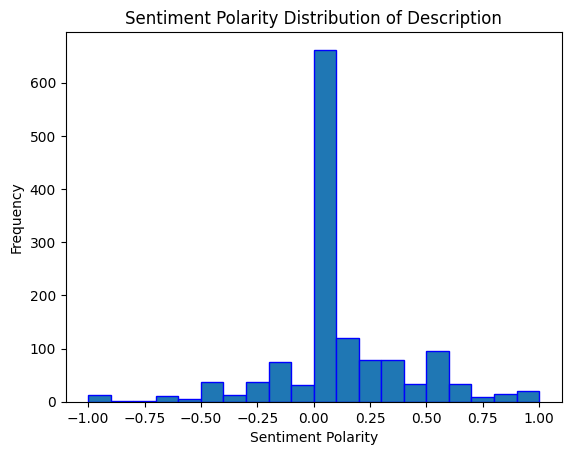

count    1368.000000
mean        0.098366
std         0.296196
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name: description_sentiment, dtype: float64


In [5]:
#Cluster Analysis Based on Type and Rating
#check if the dataset has 'title' and 'description' columns
if 'title' in df.columns and 'description' in df.columns:
    df['description_sentiment']=df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.hist(df['description_sentiment'], bins=20, edgecolor='b')
    plt.title('Sentiment Polarity Distribution of Description')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()
    print(df['description_sentiment'].describe())
else:
    print("Columns 'title' or 'description' not found in the dataset.")

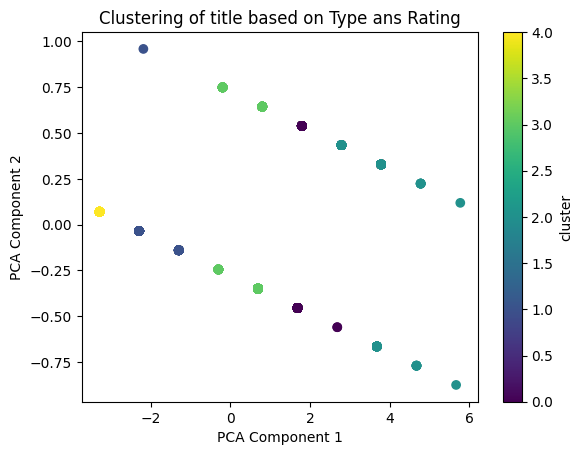

cluster centers:
 [[ 3.97111913e-01  5.00722022e+00]
 [ 3.48432056e-03  1.20905923e+00]
 [ 7.73684211e-01  6.84210526e+00]
 [ 3.13984169e-01  3.81002639e+00]
 [-3.33066907e-16  0.00000000e+00]]

Count of titles in Each Cluster:
cluster
0    277
1    287
2    190
3    379
4    235
Name: count, dtype: int64

Top Types and Ratings in Each Cluster:

Cluster 0:
Top_Types
type
Movie      167
TV Show    110
Name: count, dtype: int64
Top_Ratings
rating
TV-PG    275
TV-Y       2
Name: count, dtype: int64

Cluster 1:
Top_Types
type
Movie      286
TV Show      1
Name: count, dtype: int64
Top_Ratings
rating
PG       227
PG-13     60
Name: count, dtype: int64

Cluster 2:
Top_Types
type
TV Show    147
Movie       43
Name: count, dtype: int64
Top_Ratings
rating
TV-Y7       130
TV-Y         46
TV-Y7-FV     12
Name: count, dtype: int64

Cluster 3:
Top_Types
type
Movie      260
TV Show    119
Name: count, dtype: int64
Top_Ratings
rating
TV-G     307
TV-14     72
Name: count, dtype: int64

Cluster 4:
Top

In [6]:
#Time series Analysis- Trend Analysis Based on Date Added
if 'type' in df.columns and 'rating' in df.columns:
    le_type=LabelEncoder()
    le_rating=LabelEncoder()
    df['type_encoded']=le_type.fit_transform(df['type'])
    df['rating_encoded']=le_rating.fit_transform(df['rating'].astype(str))
    X=df[['type_encoded','rating_encoded']].dropna()
    kmeans=KMeans(n_clusters=5,random_state=42)
    df['cluster']=kmeans.fit_predict(X)
    pca=PCA(n_components=2)
    X_pca=pca.fit_transform(X)
    plt.scatter(X_pca[:,0],X_pca[:,1],c=df['cluster'],cmap='viridis')
    plt.title('Clustering of title based on Type ans Rating')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='cluster')
    plt.show()
    print("cluster centers:\n",kmeans.cluster_centers_)
    cluster_counts=df['cluster'].value_counts().sort_index()
    print("\nCount of titles in Each Cluster:")
    print(cluster_counts)
    print("\nTop Types and Ratings in Each Cluster:")
    for cluster in range(5):
        cluster_data=df[df['cluster']==cluster]
        top_types=cluster_data['type'].value_counts().head(3)
        top_ratings=cluster_data['rating'].value_counts().head(3)
        print(f"\nCluster {cluster}:")
        print("Top_Types")
        print(top_types)
        print("Top_Ratings")
        print(top_ratings)
else:
    print("Columns 'type' or 'rating' not found in the dataset.")
        

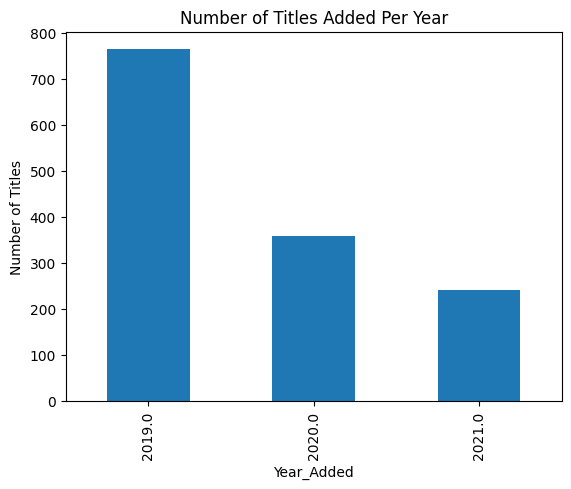

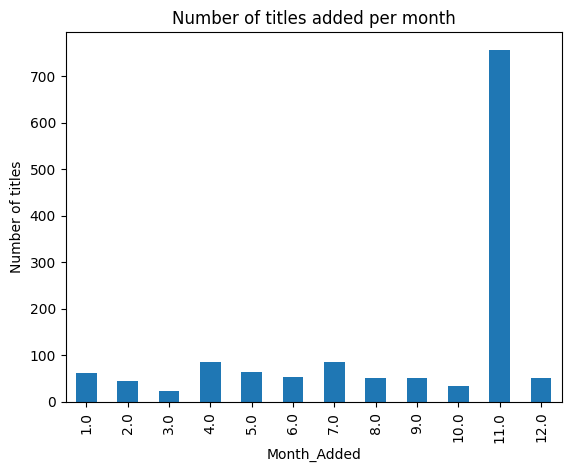

In [7]:
#trend analysis 
if 'date_added' in df.columns:
    df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
    df['year_added']=df['date_added'].dt.year
    df['month_added']=df['date_added'].dt.month
    df.groupby('year_added').size().plot(kind='bar')
    plt.title('Number of Titles Added Per Year')
    plt.xlabel('Year_Added')
    plt.ylabel('Number of Titles')
    plt.show()
    df.groupby("month_added").size().plot(kind='bar')
    plt.title("Number of titles added per month")
    plt.xlabel("Month_Added")
    plt.ylabel("Number of titles")
    plt.show()
else:
    print("column 'date_added' not found in dataset.")

In [8]:
#saving the processed data
df.to_csv('/Users/vansh/Downloads/disney_plus_titles.csv',index=False)
print("processed data saved to 'disney_plus_titles_processed.csv")

processed data saved to 'disney_plus_titles_processed.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [14]:
df= pd.read_csv("/Users/vansh/Downloads/disney_plus_titles.csv")
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df=df.dropna(subset=['date_added'])
df.set_index('date_added',inplace=True)
monthly_titles=df.resample('M').size()
monthly_titles.head()

date_added
2019-10-31      9
2019-11-30    731
2019-12-31     25
2020-01-31     44
2020-02-29     20
Freq: ME, dtype: int64

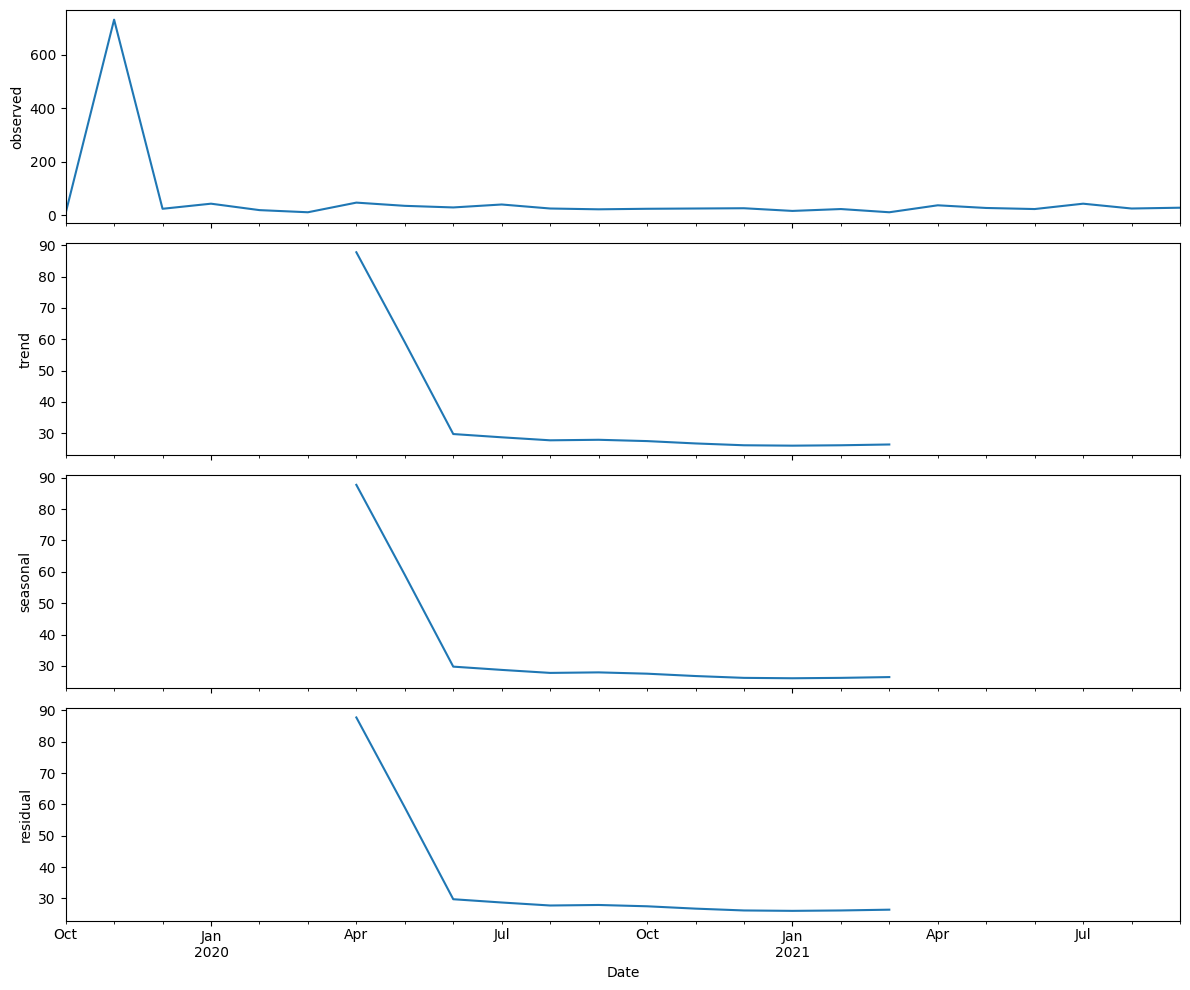

In [15]:
decomposition=seasonal_decompose(monthly_titles,model='additive')
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(12,10),sharex=True)
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('trend')
decomposition.trend.plot(ax=ax3)
ax3.set_ylabel('seasonal')
decomposition.trend.plot(ax=ax4)
ax4.set_ylabel('residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


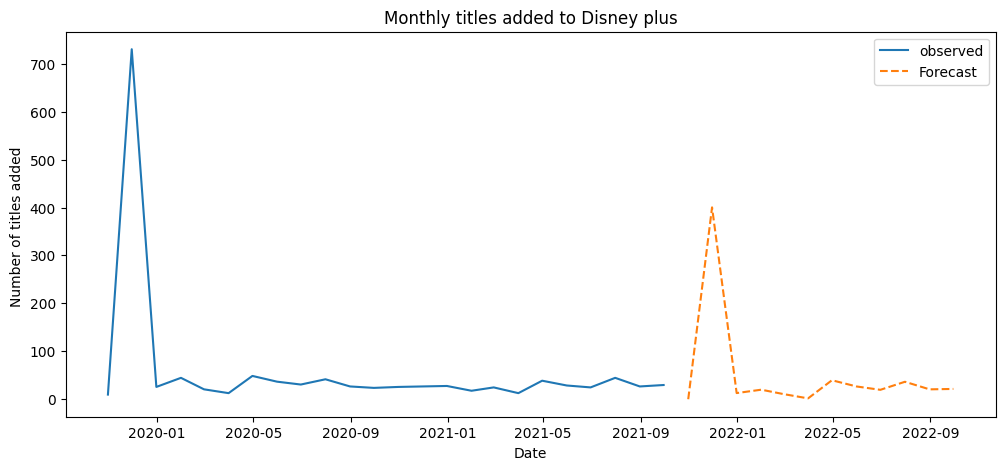

In [16]:
model=ExponentialSmoothing ( monthly_titles, seasonal='add',seasonal_periods=12)
fit=model.fit()
forecast=fit.forecast(12)
plt.figure(figsize=(12,5))
plt.plot(monthly_titles,label='observed')
plt.plot(forecast,label='Forecast',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of titles added ')
plt.title("Monthly titles added to Disney plus")
plt.legend()
plt.show()